<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()
# choose the file on your computer to upload it then


Saving Pokemon (1).csv to Pokemon (1).csv


{'Pokemon (1).csv': b'against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,type1\r\n1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,grass\r\n1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,grass\r\n1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,grass\r\n0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,fire\r\n0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,fire\r\n0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,fire\r\n1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,water\r\n1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,water\r\n1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,water\r\n1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,bug\r\n1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,20,3840,bug\r\n0.5,1,

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("Pokemon (1).csv") 
 
# Import label encoder \n",
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. \n",
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Species'.
data['type1']= label_encoder.fit_transform(data['type1'])
data['type1'].unique()
 
y=data['type1'].values
x=data.drop(['type1'], axis=1)
print(data)
print(x)
print(y)

     against_bug  against_dark  against_dragon  ...  attack  base_egg_steps  type1
0            1.0           1.0             1.0  ...      49            5120      8
1            1.0           1.0             1.0  ...      62            5120      8
2            1.0           1.0             1.0  ...     100            5120      8
3            0.5           1.0             1.0  ...      52            5120      6
4            0.5           1.0             1.0  ...      64            5120      6
..           ...           ...             ...  ...     ...             ...    ...
595          1.0           1.0             1.0  ...      77            5120      0
596          1.0           1.0             0.5  ...      50            5120      8
597          1.0           1.0             0.5  ...      94            5120      8
598          0.5           1.0             0.5  ...      55            5120     15
599          0.5           1.0             0.5  ...      80            5120     15

[60

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#SOM

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from imageio import imwrite
#from scipy.misc import imsave
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageChops

In [ ]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp37-none-any.whl size=17088 sha256=62c9bfd4b5ce09727f5b9d36cfe05bc07d98f51044c4862baaf2fd82c49cd0b6
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [ ]:
import SimpSOM as sps

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



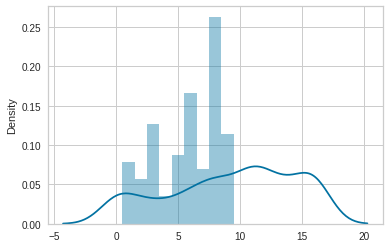

In [ ]:
train = pd.read_csv("Pokemon (1).csv")
train = train.sample(n=500, random_state=0)
train = train.drop("type1",axis=1)

#Let's plot the distribution and see if the distribution is uniform
sns.distplot((y),bins=np.arange(0.5,10.5,1))

#Then we normalize the data, a crucial step to the correct functioning of the SOM algorithm
trainSt = StandardScaler().fit_transform(train.values)

Periodic Boundary Conditions active.
The weights will be initialised with PCA.
Training SOM... done!


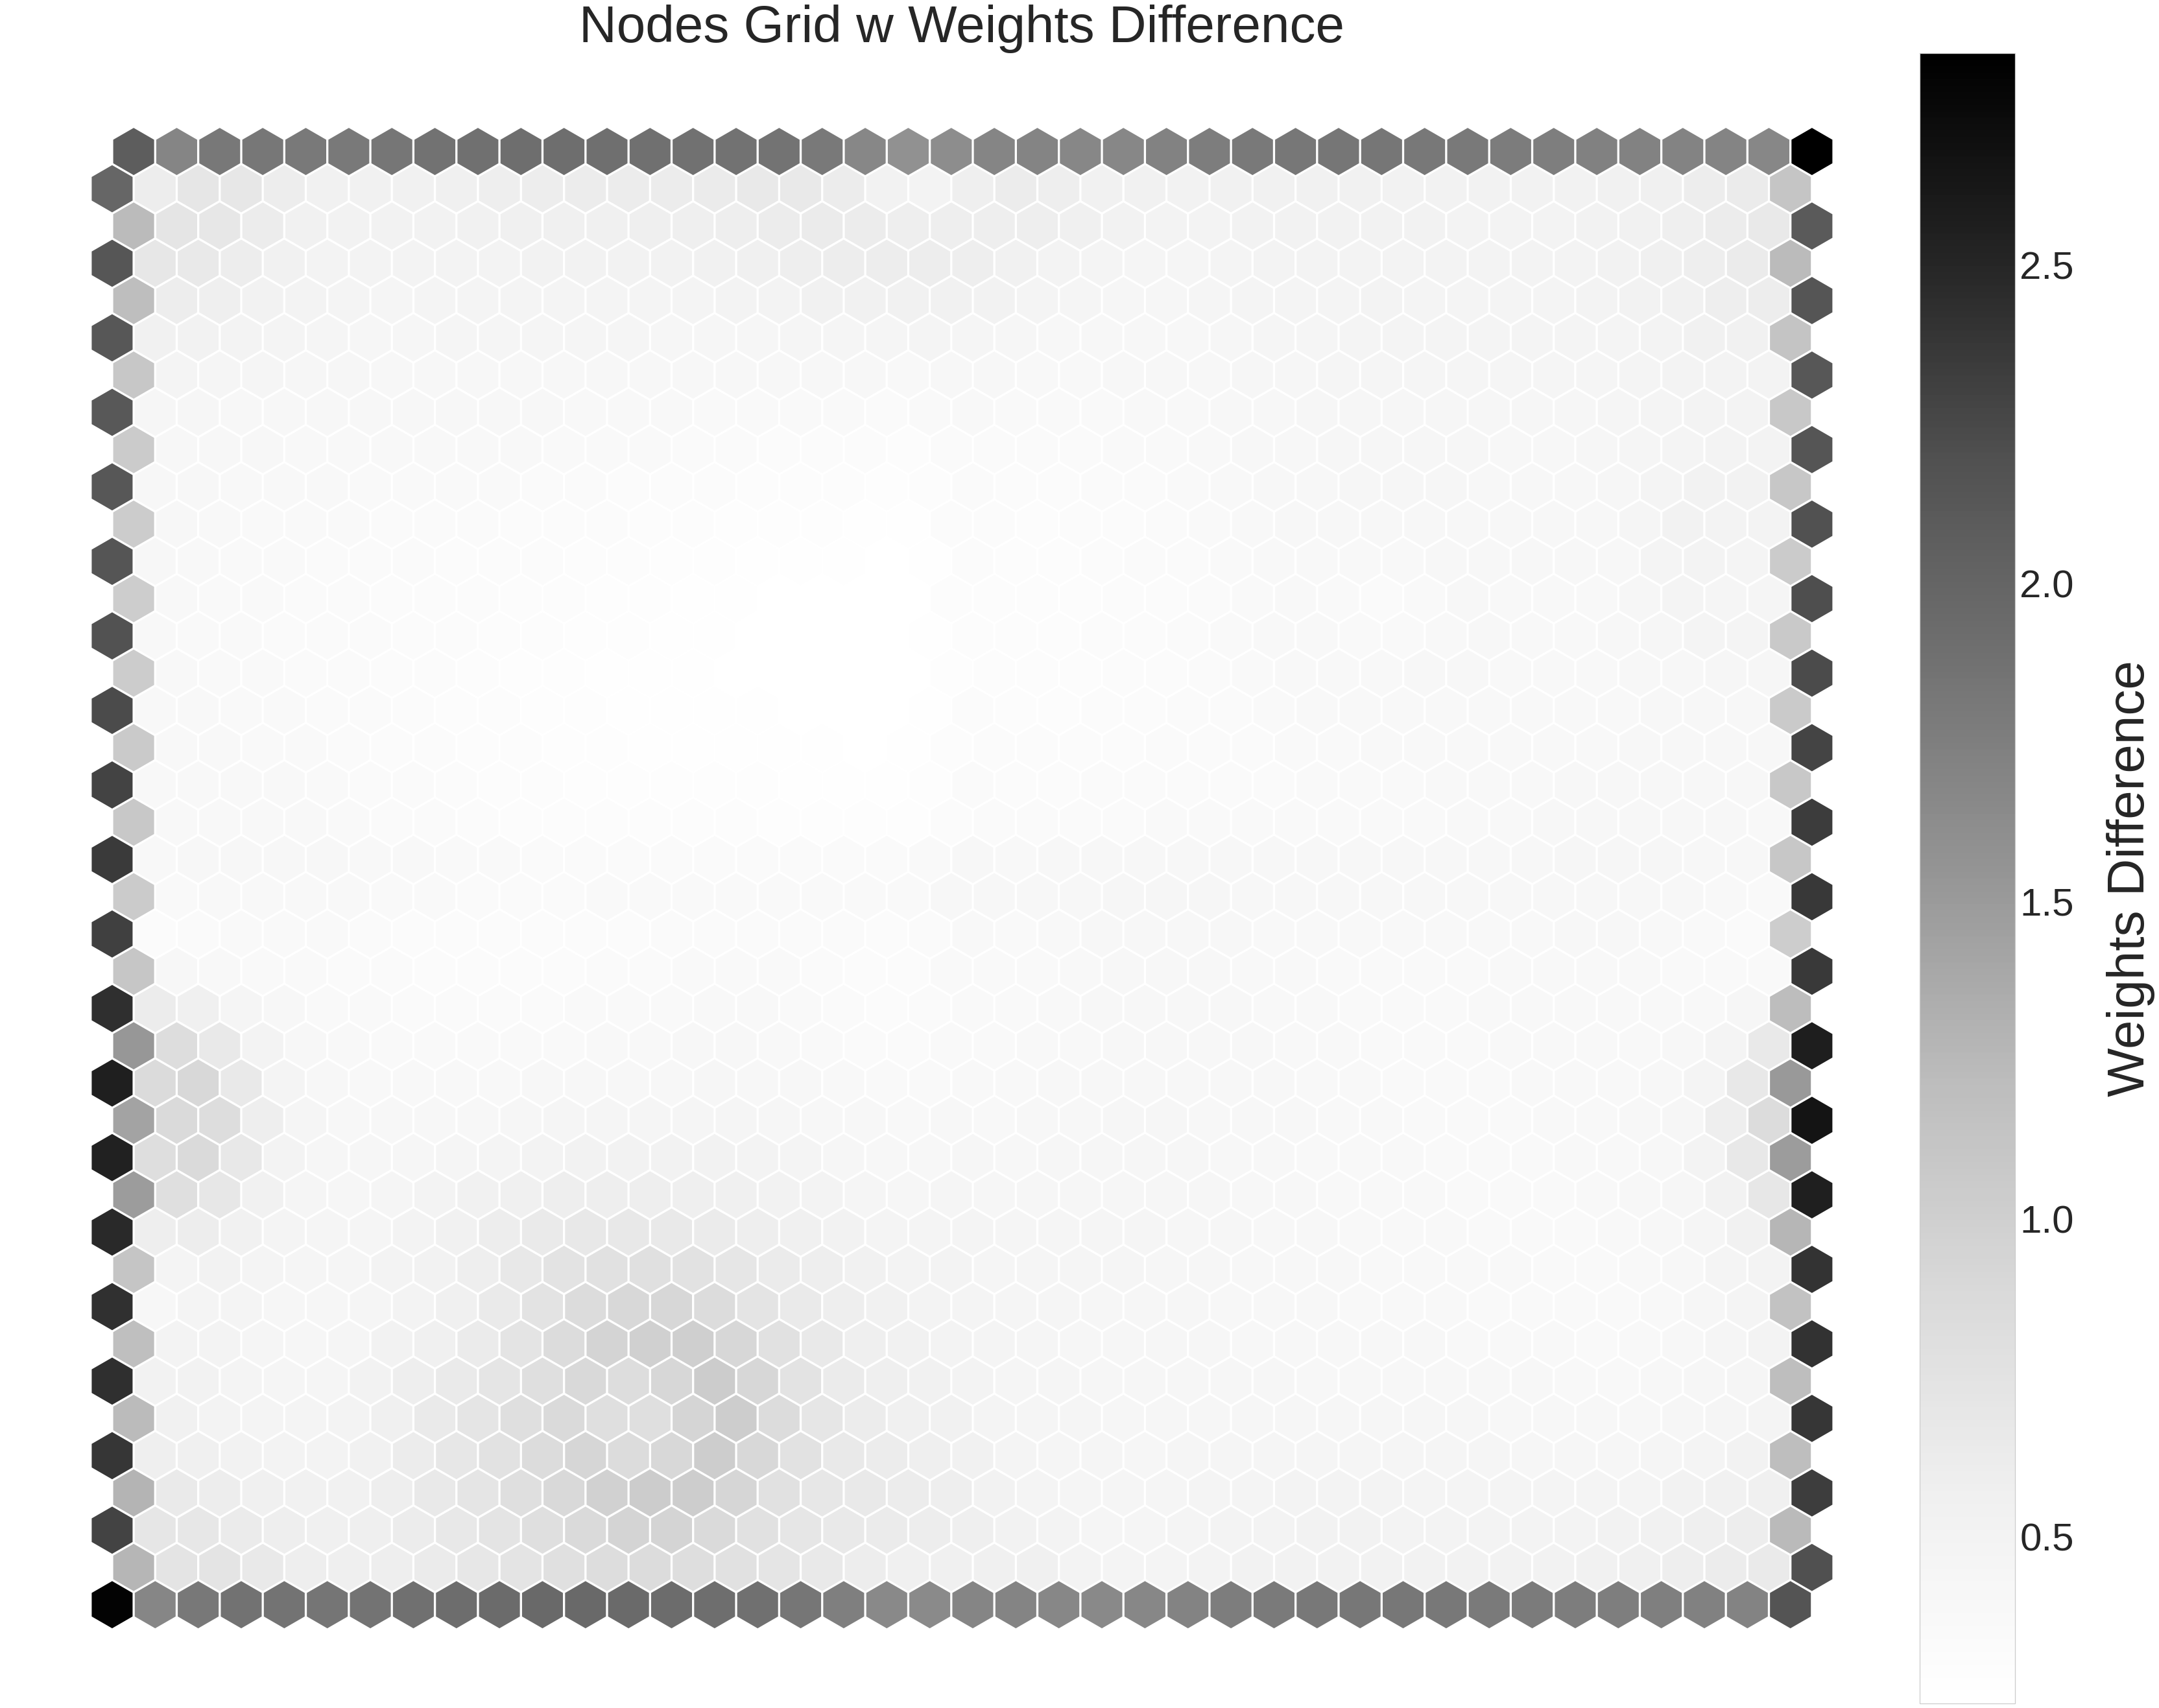

<Figure size 432x288 with 0 Axes>

In [ ]:
#We build a 40x40 network and initialise its weights with PCA 
net = sps.somNet(40, 40, trainSt, PBC=True, PCI=True)

#Now we can train it with 0.1 learning rate for 50 epochs
net.train(0.1, 50)

#We print to screen the map of the weights differences between nodes, this will help us identify cluster centers 
net.diff_graph(show=True,printout=True)

# elbow foe SOM

# K_mean

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
 
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2780.6354732584905
2 : 1189.146000741482
3 : 881.5652210403982
4 : 622.065243965324
5 : 361.2673435323945
6 : 197.2401207711202
7 : 122.64618508186518
8 : 62.288799160180815
9 : 31.22489295660988


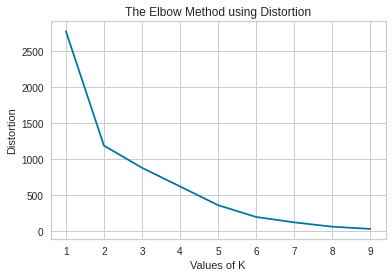

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

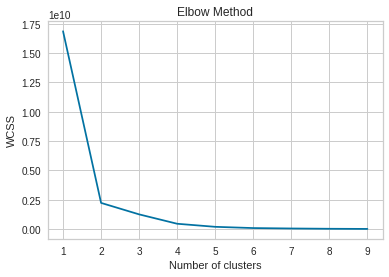

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# another k_mean 

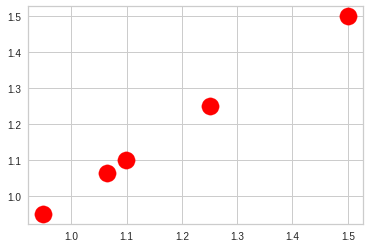

array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.pred_y = kmeans.fit_predict(x)
pred_y = kmeans.pred_y

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
kmeans.labels_[:5]

# evaluate k_MEAN

In [ ]:
from sklearn.metrics import silhouette_score
#k mean
silhouette1 = silhouette_score(x, pred_y, metric='euclidean', sample_size=None, random_state=None)
print(silhouette1)

0.8175319164893884


# accuracy of SOM

In [ ]:
!pip install sklearn-som

In [ ]:
import numpy as np
from sklearn_som.som import SOM
import pickle
from multiprocessing import cpu_count, Process, Queue

import matplotlib.patches as mptchs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
!pip install som
from pylab import plot,axis,show,pcolor,colorbar,bone
#from som import Som

     |████████████████████████████████| 112kB 29.4MB/s 
     |████████████████████████████████| 27.2MB 112kB/s 
     |████████████████████████████████| 133kB 42.8MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 7.1MB 23.8MB/s 
  Created wheel for som: filename=som-0.2.3-cp37-none-any.whl size=141545 sha256=9657c1973f84166d94d072f344d7a655a1c259930c9bf833e2275e51c8fe5e5c
  Stored in directory: /root/.cache/pip/wheels/20/a7/ad/fc949c350854ee29b67e95dc7d05b26f3986404370d00e0125
  Created wheel for deid: filename=deid-0.2.24-cp37-none-any.whl size=27234035 sha256=adda6e58a39bd2ff25874169c6e6f736c5e9fdbb9c6cac36cc647a08db0ad005
  Stored in directory: /root/.cache/pip/wheels/82/58/37/2a3ded679b4fe66aecbbb82c0b4ef43b37d9b7a99918903ab7
  Created wheel for oauth2client: filename=oauth2client-3.0.0-cp37-none-any.whl size=106376 sha256=e0bc81d27dc7a478c2cfc4de7d54d06312d92f43c4f59f10f44e2ca7d04a3f22
  Stored in directory: /root/.cache/pip/wheels/

ImportError: ignored

In [ ]:
!pip3 install git+https://github.com/compmonks/SOMPY.git

  Cloning https://github.com/compmonks/SOMPY.git to /tmp/pip-req-build-m2jp0ryj
  Running command git clone -q https://github.com/compmonks/SOMPY.git /tmp/pip-req-build-m2jp0ryj
  Created wheel for SOMPY: filename=SOMPY-1.0-cp37-none-any.whl size=24357 sha256=049a3d20c9cbe9b7b4f3f74cda4805690f943e247c50ebdce76d37ac0de5e717
  Stored in directory: /tmp/pip-ephem-wheel-cache-65ew5rnd/wheels/cc/5f/3e/4c08f1ca381629d98f50c9ba04bd95c9e704dc37ebdf301c1c
Successfully built SOMPY


In [ ]:
!pip install minisom

In [ ]:
from sklearn_som.som import SOM

In [ ]:
data_som = SOM(m=20, n=1, dim=20)
data_som.fit(train.values)

In [ ]:
predictions = data_som.predict(train.values)

In [ ]:
predictions

array([10, 12, 10, 13, 10, 12, 12,  8, 17,  8, 10,  8,  6,  8, 10, 12, 14,
       10, 10, 10,  8, 13, 18, 10, 10, 10,  8, 10, 12, 10, 10, 10, 10,  8,
       10, 10, 10, 10, 17, 10, 10,  8, 17, 10, 12, 10, 12, 10, 10, 12,  8,
       10,  8, 10, 17, 14,  8, 10,  8,  6, 13, 10,  8, 10, 10, 17, 14, 10,
       10, 10, 10, 10,  6, 12, 10, 10, 12, 10,  8, 10, 10, 10,  8,  8, 12,
       10, 10, 10, 10, 17, 18, 10, 18, 10, 10, 10, 10,  8, 17, 10, 10,  8,
       10,  8,  8,  8, 12, 18, 10, 10, 12, 14, 10, 10, 10, 13, 10, 10,  8,
       10, 10, 10, 10, 10, 10, 10, 10,  8, 10, 17, 10, 10, 10, 10, 17, 10,
        8, 13, 12,  6,  6,  8, 10, 17,  8, 10, 10, 14, 18, 10, 10,  8, 10,
       10, 10, 14, 17, 10, 17, 10,  8, 10, 10, 10, 10, 10, 10, 18, 10, 10,
       10, 10, 10, 12, 10, 14, 12, 10, 14, 17, 13, 10, 12, 10, 12, 10, 10,
       10,  8, 18, 10,  6, 10, 10,  8, 10, 12, 10, 12, 10, 10, 10, 10, 18,
       10, 10, 10, 12, 18, 18,  6, 17,  8, 10, 10, 13, 10, 10, 12, 14,  6,
        8, 10, 10, 12, 17

In [ ]:
data_som.pred_y = data_som.fit_predict(train.values)
pred_y_1 = data_som.pred_y

In [ ]:
from sklearn.metrics import silhouette_score
#k mean
silhouette1 = silhouette_score(train.values, pred_y_1, metric='euclidean', sample_size=None, random_state=None)
print(silhouette1)

0.7446166616499394


# elbow for SOM

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



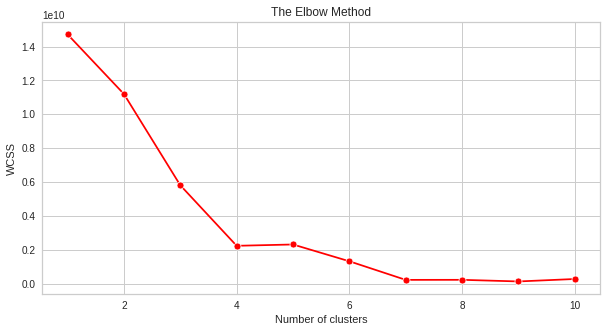

In [ ]:

wcss = []
from sklearn_som.som import SOM
for i in range(1, 11):
    
    data_som = SOM(m=i, n=1, dim=20)
    data_som.fit(train.values)
    wcss.append(data_som.inertia_)



plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x)
X_embedded.shape

(600, 2)

In [ ]:
data_som_1 = SOM(m=20, n=1, dim=20)
data_som_1.fit(X_embedded[1])

In [ ]:
predictions = data_som_1.predict(train.values)

In [ ]:
data_som_1.pred_y = data_som_1.fit_predict(train.values)
pred_y_2 = data_som_1.pred_y

In [ ]:
from sklearn.metrics import silhouette_score
silhouette1 = silhouette_score(train.values, pred_y_2, metric='euclidean', sample_size=None, random_state=None)
print(silhouette1)

0.9454020918710592


In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(X_embedded.shape[0])

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

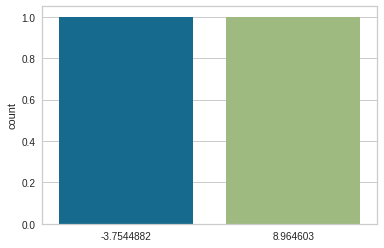

In [ ]:
%matplotlib inline
import seaborn as sns
import numpy
import seaborn

#data = numpy.array([1, 2, 2, 3, 3, 3])
ax = seaborn.countplot(x=X_embedded[1])
#sns.factorplot(x='Program', y='Value', data=X_embedded)

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(X_embedded.shape[0])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_mega = data[data['type1'].map(lambda x:'Mega ' in x)==True].reset_index(drop=True)

# Names of Mega-Evolved Pokemons are too long. Truncate them to normal form
df_mega['Name'] = df_mega['Name'].map(lambda x:x[x.index('Mega ')+5:])

use_attributes = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
data = df_mega[use_attributes].values

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=42)
tsne = pd.DataFrame(model.fit_transform(data))

graph = sns.jointplot(x=0, y=1, data=tsne, kind='reg', marginal_kws=dict(bins=20, rug=True), size = 10, xlim=(-200, 300), ylim=(-200, 200))
graph.ax_joint.cla()

plt.sca(graph.ax_joint)
x, y, colors = tsne[0], tsne[1], df_mega['Type 1'].map(lambda x:COLOR_MAP[x])
plt.scatter(x, y, color = colors)
plt.xlim(-200, 250)
plt.ylim(-200, 200)

for i, txt in enumerate(df_mega['Name']):
    plt.annotate(txt, (x[i], y[i]))
plt.show()